## Sleep Data

* Import Libraries

In [2]:
import numpy as np
import pandas as pd

* Loading Dataset

In [3]:
df=pd.read_csv("/content/sleepDay_merged.csv")
df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


## Data Cleaning

* Now we change the data type of **SleepDay** into date type

In [4]:
df['SleepDay'] = pd.to_datetime(df['SleepDay'])

In [5]:
df

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712
...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360
409,8792009665,2016-05-01,1,503,527
410,8792009665,2016-05-02,1,415,423
411,8792009665,2016-05-03,1,516,545


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


* Adding New column **Sleeping_Hour** in hour

In [7]:
df['Sleeping_Hour'] =  df['TotalTimeInBed']/60
df['Sleeping_Hour'] = df['Sleeping_Hour'].round(1)
df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Sleeping_Hour
0,1503960366,2016-04-12,1,327,346,5.8
1,1503960366,2016-04-13,2,384,407,6.8
2,1503960366,2016-04-15,1,412,442,7.4
3,1503960366,2016-04-16,2,340,367,6.1
4,1503960366,2016-04-17,1,700,712,11.9


In [8]:
df=df.rename(columns={'SleepDay':'Sleep_Day','TotalSleepRecords':'Total_Sleep_Records','TotalMinutesAsleep':'Total_Minutes_Asleep','TotalTimeInBed':'Total_Time_In_Bed'})
df

,Id,Sleep_Day,Total_Sleep_Records,Total_Minutes_Asleep,Total_Time_In_Bed,Sleeping_Hour
0,1503960366,2016-04-12,1,327,346,5.8
1,1503960366,2016-04-13,2,384,407,6.8
2,1503960366,2016-04-15,1,412,442,7.4
3,1503960366,2016-04-16,2,340,367,6.1
4,1503960366,2016-04-17,1,700,712,11.9
...,...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360,6.0
409,8792009665,2016-05-01,1,503,527,8.8
410,8792009665,2016-05-02,1,415,423,7.0
411,8792009665,2016-05-03,1,516,545,9.1


In [9]:
df.shape

(413, 6)

In [10]:
df.to_csv("sleep_data.csv")

In [11]:
df['Id'].unique()

array([1503960366, 1644430081, 1844505072, 1927972279, 2026352035,
       2320127002, 2347167796, 3977333714, 4020332650, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6775888955, 6962181067, 7007744171,
       7086361926, 8053475328, 8378563200, 8792009665])

## EDA

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Line Plot for Total Steps Over Time

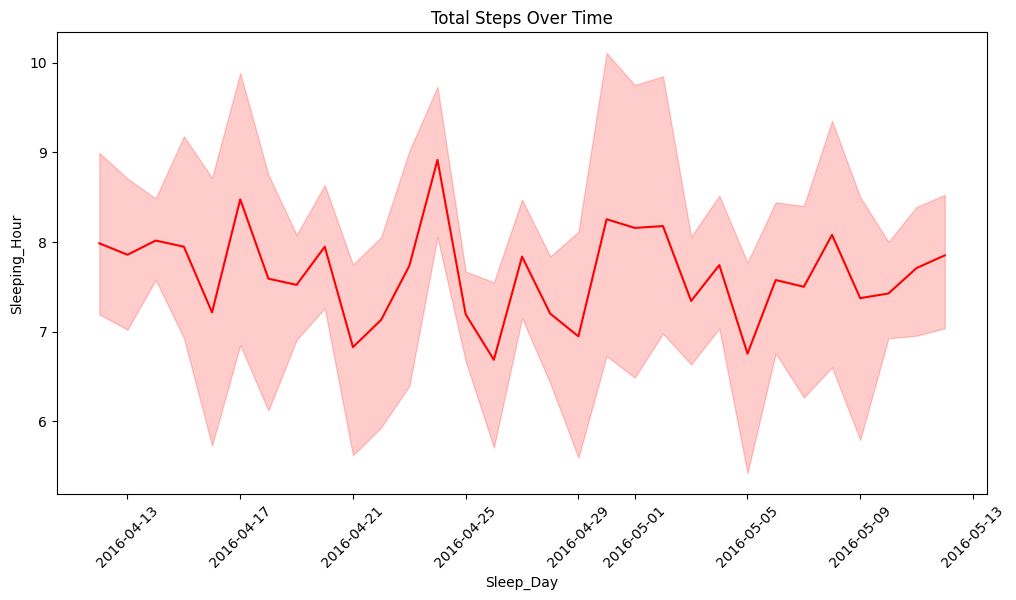

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Sleep_Day', y='Sleeping_Hour', data=df,color='red')
plt.title('Total Steps Over Time')
plt.xticks(rotation=45)
plt.show()

## Bar Plot for Sleep Metrics Averges

In [38]:
avg_minutes_asleep = df['Total_Minutes_Asleep'].mean()
avg_time_in_bed = df['Total_Time_In_Bed'].mean()

fig = px.bar(x=['Average Total Minutes Asleep', 'Average Total Time in Bed'],
             y=[avg_minutes_asleep, avg_time_in_bed],
             labels={'x': 'Metrics', 'y': 'Average'},
             title='Sleep Metrics Averages')
fig.show()

## Bar Plot for Total Sleep Record for Each Day

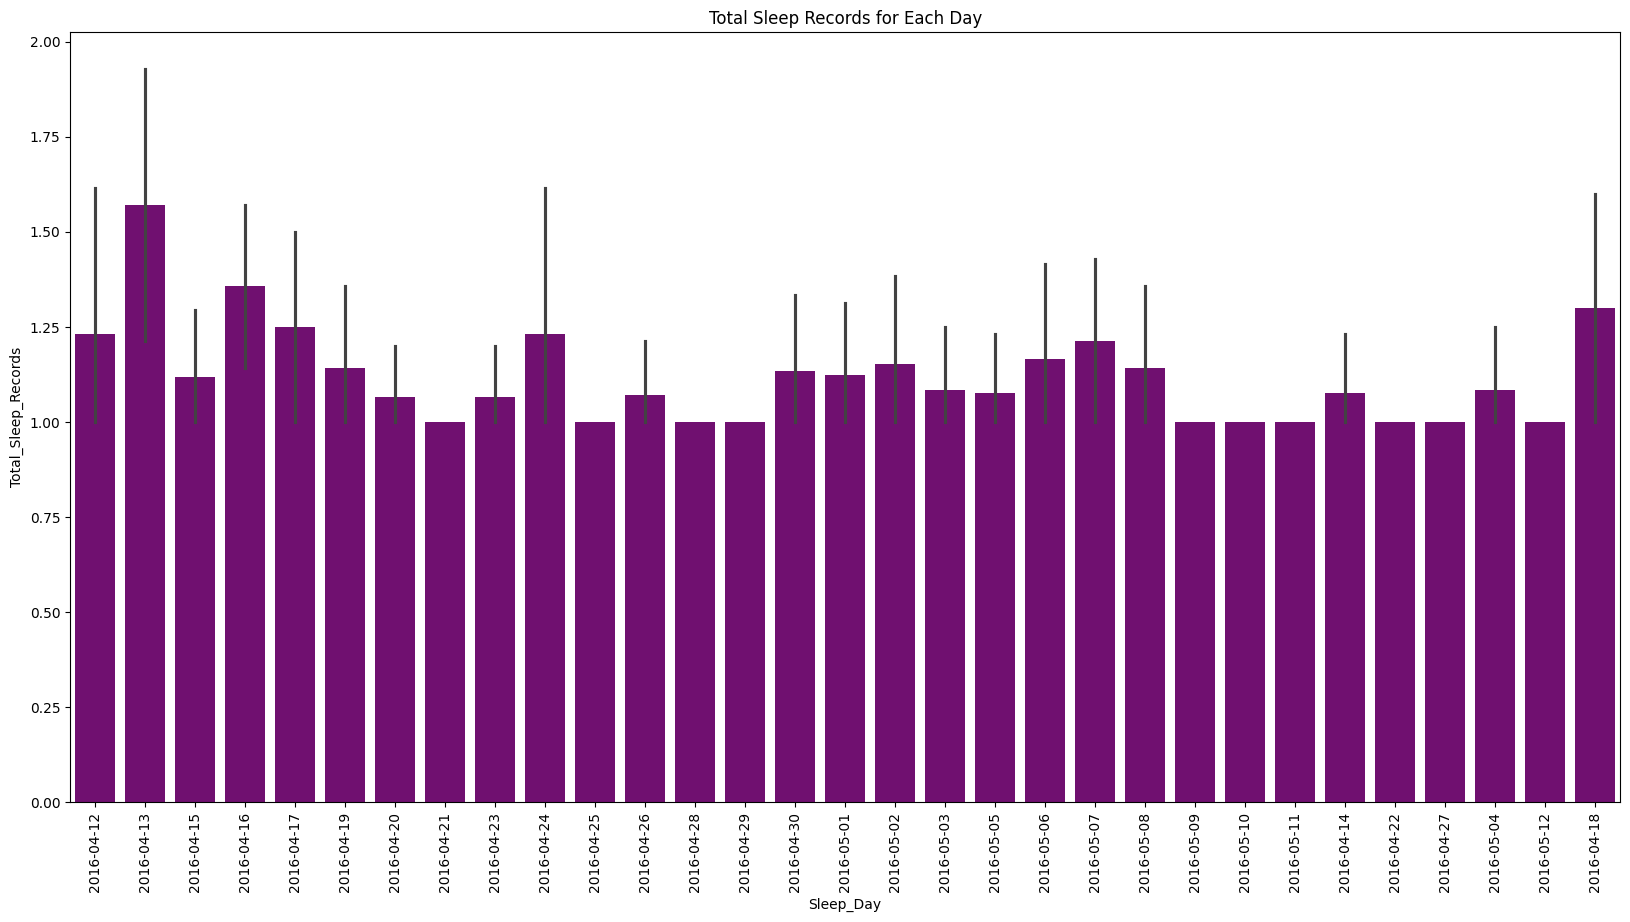

In [23]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Sleep_Day', y='Total_Sleep_Records', data=df,color='Purple')
plt.title('Total Sleep Records for Each Day')
plt.xticks(rotation=90)
plt.show()


## Box Plot-Total Minutes Asleep for Each Day

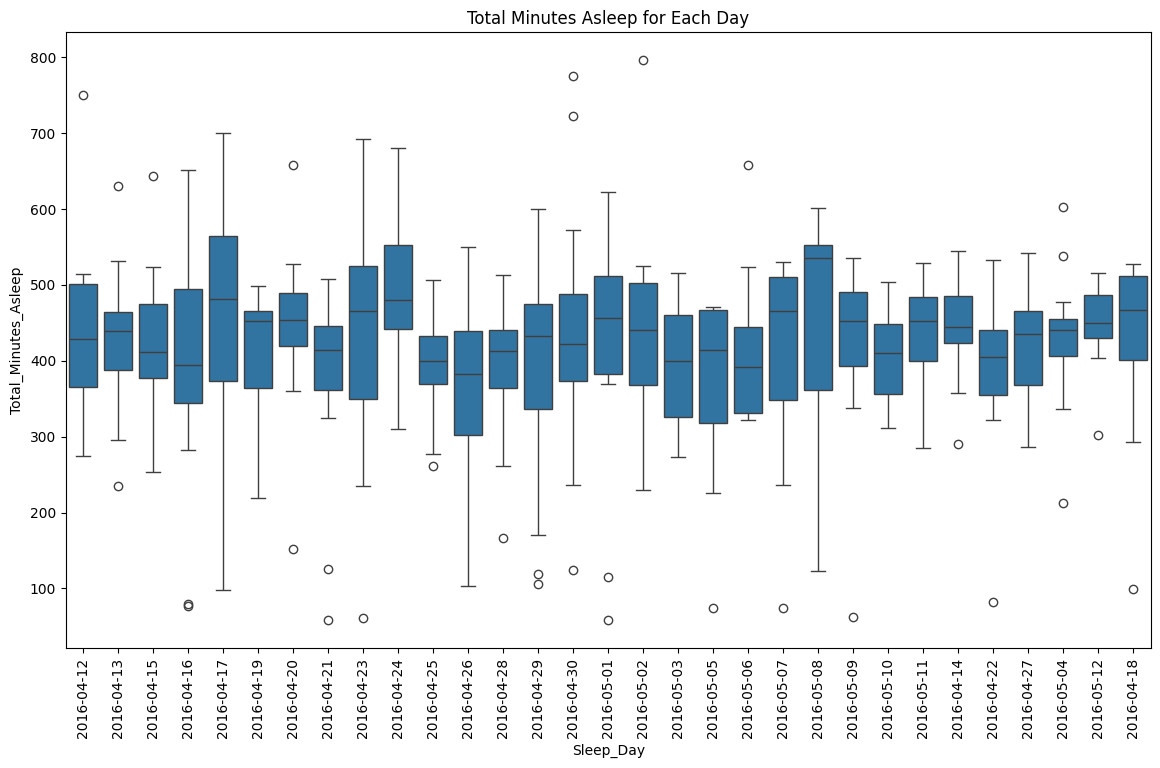

In [24]:

plt.figure(figsize=(14, 8))
sns.boxplot(x='Sleep_Day', y='Total_Minutes_Asleep', data=df)
plt.title('Total Minutes Asleep for Each Day')
plt.xticks(rotation=90)
plt.show()


## Box Plot-Total Time In Bed for Each Day

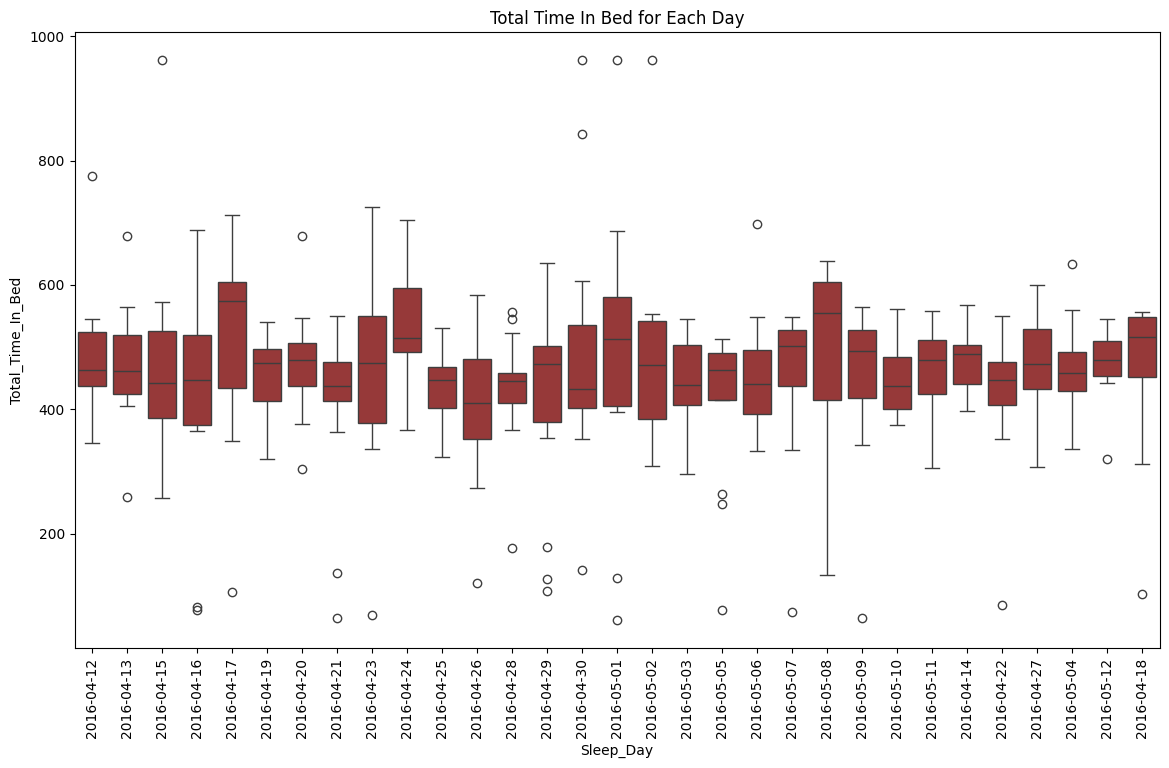

In [29]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Sleep_Day', y='Total_Time_In_Bed', data=df,color='Brown')
plt.title('Total Time In Bed for Each Day')
plt.xticks(rotation=90)
plt.show()